In [3]:
import pandas as pd

df = pd.read_csv('lego_sets.csv')

theme = pd.read_csv('parent_themes.csv')

theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


## 1) What % of all licensed sets ever released were Star Wars themed?

In [5]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [6]:
theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [10]:
merged = df.merge(theme, left_on='parent_theme', right_on='name')
merged.drop(columns='name_y', inplace=True)
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [29]:
merged[merged['set_num'].isnull()]

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
11833,NaN,NaN,2017,347.0,NaN,Disney Princess,579,True
11834,NaN,NaN,2016,70.0,NaN,Disney Princess,579,True
11835,NaN,NaN,2016,NaN,NaN,Disney Princess,579,True
11836,NaN,NaN,2017,304.0,NaN,Super Heroes,482,True
11837,NaN,NaN,2017,196.0,NaN,Super Heroes,482,True
...,...,...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft,577,True
11982,NaN,NaN,2006,NaN,NaN,Super Heroes,482,True
11983,NaN,NaN,2017,NaN,NaN,Minecraft,577,True
11984,NaN,NaN,2017,8.0,NaN,Super Heroes,482,True


In [31]:
licensed = merged[merged['is_licensed']]
licensed = licensed.dropna(subset=['set_num'])
licensed.head()


star_wars = licensed[licensed['parent_theme']== 'Star Wars']

the_force = ((star_wars.shape[0]/licensed.shape[0])*100)

print(the_force)

51.653944020356235


## Answer: 51.65%

# 2) In which year was Star Wars not the most popular licensed theme?

In [35]:
licensed_sorted = licensed.sort_values('year')


In [49]:
licensed_sorted['count'] = 1
licensed_sorted.head()
summed_df = licensed_sorted.groupby(['year', 'parent_theme']).sum().reset_index()

max_df = summed_df.sort_values('count', ascending=False).drop_duplicates(['year'])

max_df.sort_values('year', inplace=True)
max_df

,year,parent_theme,set_num,name_x,num_parts,theme_name,id,is_licensed,count
0,1999,Star Wars,7141-17150-17151-17131-17161-17130-17171-17128...,Naboo FighterTIE Fighter & Y-wingSith Infiltra...,1384.0,Star Wars Episode 1Star Wars Episode 4/5/6Star...,2054,13,13
2,2000,Star Wars,7134-13341-1VP-87104-14151270-13343-13342-1712...,A-wing FighterStar Wars #2 - Luke/Han/Boba Min...,2580.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,4108,26,26
4,2001,Star Wars,7146-18008-1VP-28007-165028-165030-165034-1710...,TIE FighterStormtrooper™Star Wars Co-Pack of 7...,2949.0,Star Wars Episode 4/5/6Star WarsStar Wars Epis...,2212,14,14
6,2002,Star Wars,4195641-1K7153-1K7204-1K720x-18009-18010-18011...,Star Wars Co-Pack of 7142 and 7152Episode II U...,4735.0,Star Wars Episode 4/5/6Star Wars Episode 2Star...,4424,28,28
9,2003,Star Wars,4481-14480-14479-14478-14476-14475-14207901-14...,Hailfire DroidJabba's PalaceTIE BomberGeonosia...,6660.0,Star WarsStar Wars Episode 4/5/6Star Wars Epis...,5056,32,32
12,2004,Star Wars,4501-2K10131-14502-24500-210134-14483-24495-14...,"Mos Eisley Cantina, Original Trilogy Edition b...",1659.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,3160,20,20
16,2005,Star Wars,K7283-16966-165771-16966-26965-265845-165844-1...,V-wing Space Battle CollectionJedi Starfighter...,4730.0,Star Wars Episode 3MiniStar Wars Episode 3Mini...,4424,28,28
20,2006,Star Wars,7261-210175-110174-16205-16206-16207-16208-162...,Clone Turbo Tank (with Non-Light-Up Mace Windu...,2769.0,Star Wars Episode 3Star Wars Episode 4/5/6Star...,1738,11,11
24,2007,Star Wars,66221-17664-110179-110178-17665-17662-17654-17...,X-wing Fighter and Luke Pilot Maquette Co-Pack...,11361.0,Star Wars Episode 4/5/6Star Wars OtherStar War...,2528,16,16
28,2008,Star Wars,20006-110186-18031-18029-18028-17668-17667-110...,Clone Turbo Tank - MiniGeneral GrievousV-19 To...,6865.0,Star Wars Episode 3Star Wars Episode 3Star War...,3634,23,23


In [50]:
new_era = 2017

## Answer : 2017

### 3) Break down number of sets by year

In [57]:
clean_df = merged[-merged['set_num'].isnull()]
clean_df['count'] = 1
sets_per_year = clean_df.groupby(['year']).sum().reset_index()[['year','count']]

for index,row in sets_per_year.iterrows():
    print(row['year'],row['count'])

1950 7
1953 4
1954 14
1955 28
1956 12
1957 21
1958 42
1959 4
1960 3
1961 17
1962 40
1963 18
1964 11
1965 10
1966 89
1967 21
1968 25
1969 69
1970 29
1971 45
1972 38
1973 68
1974 39
1975 31
1976 68
1977 92
1978 73
1979 82
1980 88
1981 79
1982 76
1983 57
1984 76
1985 139
1986 123
1987 209
1988 68
1989 114
1990 85
1991 106
1992 115
1993 111
1994 128
1995 128
1996 144
1997 194
1998 325
1999 300
2000 327
2001 339
2002 447
2003 415
2004 371
2005 330
2006 283
2007 319
2008 349
2009 403
2010 444
2011 502
2012 615
2013 593
2014 715
2015 670
2016 608
2017 438


/var/folders/cx/td960h412j76k6x1qhlfdhh40000gn/T/ipykernel_49172/3009026408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['count'] = 1


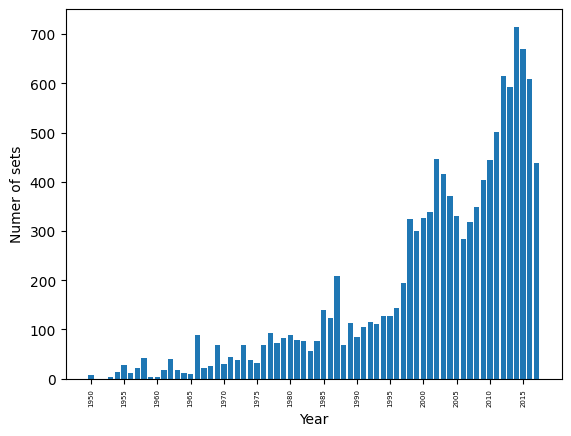

In [69]:
import matplotlib.pyplot as plt
import numpy as np

year = [year for year, df in clean_df.groupby('year')]
plt.bar(year, sets_per_year['count'])
plt.xticks(year, rotation='vertical', size=5)
plt.xticks(np.arange(1950,2017, step=5))
plt.ylabel('Numer of sets')
plt.xlabel('Year')
plt.show()